In [ ]:
#importing libraries : Pandas,numpy,string,regular expression,natural language tool kit,Scikit-learn,tensorflow,keras
import pandas as pd
import numpy as np
import string
import re
import nltk
#downloading the punctuations and stopwords from natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
#importing stopwords for the tweets
from nltk.corpus import stopwords
sw = stopwords.words('english')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#importing the layers required for the model
from tensorflow.keras.layers import Dense, LSTM,Bidirectional, Dropout,MaxPool2D,Conv1D,MaxPool1D,RNN,SimpleRNN,LSTMCell,TimeDistributed,GRU,GRUCell
#importing the label encoding
from sklearn.preprocessing import LabelEncoder
#importing tokenizers from natural language toolkit
from nltk.tokenize import word_tokenize, sent_tokenize
#importing the embedding layer
from keras.layers import Embedding
#importing metrics
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
#importing regularizers
from tensorflow.keras import regularizers
#importing lasso and ridge regression
from keras.regularizers import l2,l1
#importing matplotlib
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#reading the training dataset
data = pd.read_csv('train.csv')

In [ ]:
#reading the training dataset
testdata = pd.read_csv('test.csv')

In [ ]:
#reading headers in training data
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
#removing the blank spaces
data = data.dropna()

In [ ]:
#Assigning the text in the dataset to variable X
X = data['text']

In [ ]:
#test variables
X_test=testdata['text']
y_test=testdata['sentiment']
y_test=LabelEncoder().fit_transform(y_test)

In [ ]:
#Assigning the sentiment in the dataset to variable Y
y = data['sentiment']

In [ ]:
y

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27480, dtype: object

In [ ]:
#application of label encoding and tranforming y
y = LabelEncoder().fit_transform(y)


In [ ]:
#Visualising y after transformation
y


array([1, 0, 0, ..., 2, 2, 1])

In [ ]:
#Coverting the string to lower case and iterating through the words and appending them to the list if the word is not a for X
X = X.str.lower()

lst = []
for phase_word in X:
    lst.append(" ".join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
X = lst

In [ ]:
#Coverting the string to lower case and iterating through the words and appending them to the list if the word is not a for X_test
X_test = X_test.str.lower()

lst = []
for phase_word in X_test:
    lst.append(" ".join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
X_test = lst

In [ ]:
#iterating through the word list for each sentence and assigning to tokens
for i in range(len(X)):
    X[i] = word_tokenize(X[i])

In [ ]:
#iterating through the word list for each sentence and assigning to tokens
for i in range(len(X_test)):
    X_test[i] = word_tokenize(X_test[i])

In [ ]:
#Splitting the training set into validation and training 
X_train, X_val, y_train, y_val = train_test_split(np.array(X), y, test_size=0.2) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
#Reading the glove vector file and retrieving the embedding index
  f = open('glove.6B.50d.txt')

  embeddings_index = {}
  cnt = 0
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float')
      embeddings_index[word] = coefs
  f.close()

In [ ]:
#creating a method for embedding
def embedding_output(X):
  max_len=50
  emb_dim=50
  embedding_out = np.zeros((len(X), max_len, emb_dim))


  for ix in range(len(X)):
    for ij in range(len(X[ix])):
      try:
        embedding_out[ix][ij] = embeddings_index[X[ix][ij].lower()]
      except: 
        embedding_out[ix][ij] = np.zeros((50, ))

  return embedding_out

In [ ]:
#assigning embedding matrix for training and validation sets
embedding_matrix_train = embedding_output(X_train)
embedding_matrix_val = embedding_output(X_val)
embedding_matrix_test=embedding_output(X_test)

In [ ]:
#Visualizing the shape of embedding matrix
embedding_matrix_train.shape

(21984, 50, 50)

In [ ]:
#creating the model for Tweet sentiment extraction and compiling it
model = Sequential()
model.add(Bidirectional(LSTM((15), input_shape=(50, 50))))
model.add(Dropout(0.4))
model.add(Dense(units=12, activation='softmax',kernel_regularizer='l1',bias_regularizer='l1'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
prediction=model.predict
hist = model.fit(embedding_matrix_train, y_train, epochs=40, validation_data=(embedding_matrix_val, y_val))



Epoch 1/40
687/687 [==============================] - 37s 11ms/step - loss: 1.8831 - accuracy: 0.3732 - val_loss: 1.1517 - val_accuracy: 0.5573
Epoch 2/40
687/687 [==============================] - 6s 9ms/step - loss: 1.1672 - accuracy: 0.5349 - val_loss: 1.0841 - val_accuracy: 0.6250
Epoch 3/40
687/687 [==============================] - 6s 9ms/step - loss: 1.1001 - accuracy: 0.6032 - val_loss: 1.0545 - val_accuracy: 0.6396
Epoch 4/40
687/687 [==============================] - 6s 9ms/step - loss: 1.0767 - accuracy: 0.6231 - val_loss: 1.0391 - val_accuracy: 0.6492
Epoch 5/40
687/687 [==============================] - 6s 9ms/step - loss: 1.0624 - accuracy: 0.6326 - val_loss: 1.0283 - val_accuracy: 0.6547
Epoch 6/40
687/687 [==============================] - 6s 9ms/step - loss: 1.0562 - accuracy: 0.6363 - val_loss: 1.0268 - val_accuracy: 0.6563
Epoch 7/40
687/687 [==============================] - 6s 9ms/step - loss: 1.0555 - accuracy: 0.6365 - val_loss: 1.0209 - val_accuracy: 0.6592
Epoc

In [ ]:
#predicting the values of embedding matrix
model.predict(embedding_matrix_val[0:10])

array([[0.04917233, 0.17114656, 0.752749  , 0.00299115, 0.00299406,
        0.00299095, 0.00299249, 0.00299076, 0.00299311, 0.00299419,
        0.0029947 , 0.00299071],
       [0.18711571, 0.305138  , 0.47593448, 0.00353208, 0.00353704,
        0.00353311, 0.00353449, 0.00353315, 0.00353509, 0.00353675,
        0.00353647, 0.00353362],
       [0.09623089, 0.6000769 , 0.27390188, 0.00330677, 0.00331242,
        0.00330959, 0.00331028, 0.00330676, 0.00331126, 0.00331268,
        0.00331043, 0.00331005],
       [0.22773431, 0.6345929 , 0.11376897, 0.00265322, 0.00265795,
        0.00265538, 0.00265626, 0.00265422, 0.00265677, 0.00265779,
        0.00265577, 0.00265642],
       [0.03929068, 0.2352588 , 0.7008312 , 0.00273409, 0.00273706,
        0.00273439, 0.0027356 , 0.00273351, 0.00273619, 0.00273731,
        0.00273705, 0.00273412],
       [0.09372756, 0.21094996, 0.66508156, 0.00335864, 0.00336202,
        0.00335811, 0.00336051, 0.00335828, 0.00336081, 0.00336193,
        0.00336229,

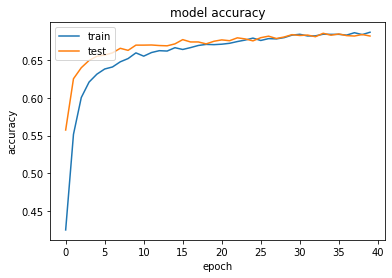

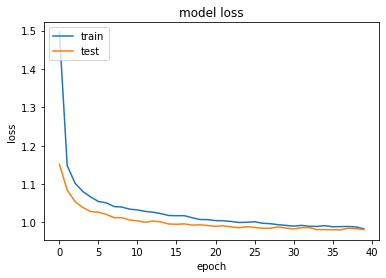

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#visualizing yval array to see the classification of tweets
y_val[0:10]

array([2, 2, 1, 1, 2, 1, 2, 2, 1, 1])

In [ ]:
# Define metrics
y_pred = model.predict(embedding_matrix_test)
pred = []
for i in range(len(X_test)):
   pred.append(np.argmax(y_pred[i]))

In [ ]:
pred = np.array(pred)

In [ ]:
#calculating the f1 score for the model
f1_score(y_test, pred, average='macro')

0.6954189137922189

In [ ]:
#calculating the recall score for the model
recall_score(y_test, pred, average='macro')

0.6919795526323179

accuracy_score(y_test)

In [ ]:
#calculating the precision score for the model
precision_score(y_test, pred, average="macro")

0.7001150224954978

In [ ]:
#calculating the accuracy score for the model
accuracy_score(y_test, pred)

0.6943972835314092

In [ ]:
#Display the architecture of the model
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 30)                6030      
_________________________________________________________________
dropout_12 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 12)                372       
Total params: 6,402
Trainable params: 6,402
Non-trainable params: 0
_________________________________________________________________
